<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/PCVK_Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASYA SEVIA ADHA/17/TI-3D/2041720031

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**1. Gamma Correction** - Pada percobaan ini, nilai 
Gamma akan diset dengan meminta masukan dari pengguna.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


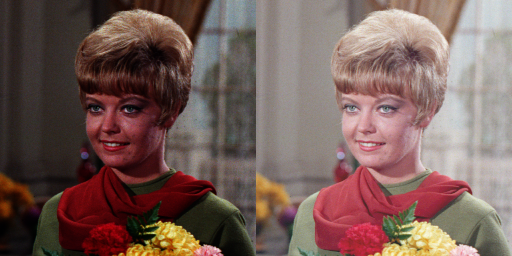

In [13]:
print(' Gamma Correction pada citra ') 
print('----------------------------------') 
try: 
  gamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**2. Simulasi Image Depth** - 
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra

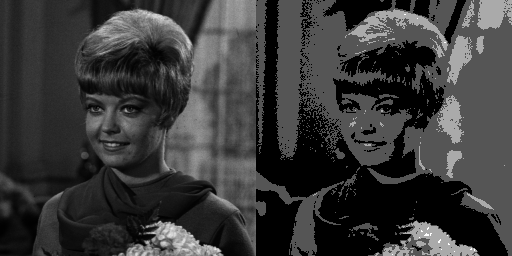

In [15]:
bit_depth=2
bit = 2**bit_depth
level = 255 / (pow(2,bit_depth)-1) 
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      # Rumus Bit Depth
      depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

      final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

**3. Average Denoising** - Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab 
sebelumnya

Jumlah Citra di Average = 5
Nilai PSNR = 27.531702536476747 dB


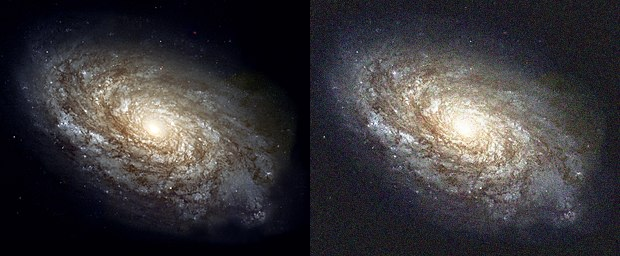

In [18]:
# No 1
# Jumlah Citra = 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[4]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 30
Nilai PSNR = 27.52037923962465 dB


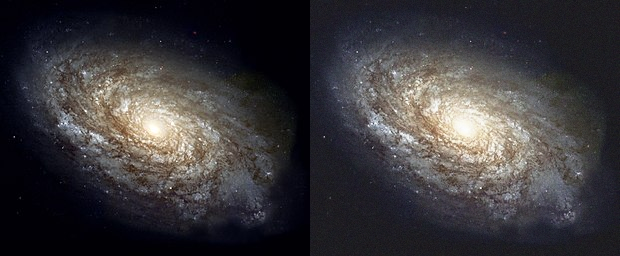

In [19]:
# No 2
# Jumlah Citra = 30

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[29]

for i in range(29):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  

        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 30')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 60
Nilai PSNR = 27.489584918938256 dB


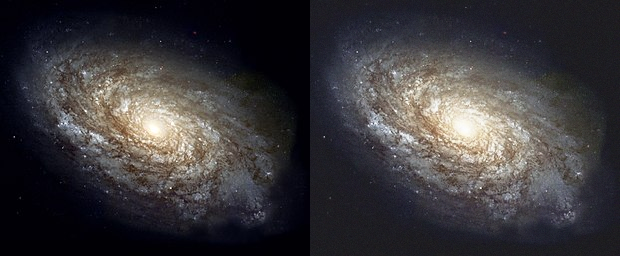

In [20]:
# No 3
# Jumlah Citra = 60

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[59]

for i in range(59):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  

        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 60')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 90
Nilai PSNR = 27.50964978778982 dB


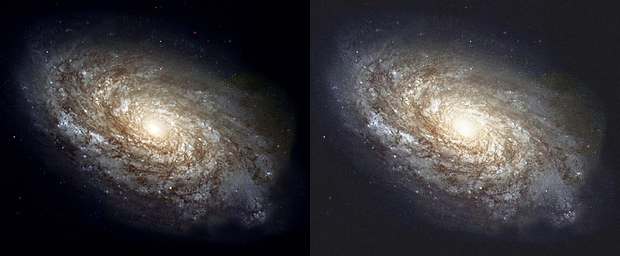

In [21]:
# No 4
# Jumlah Citra = 80

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[79]

for i in range(79):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  

        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 90')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 100
Nilai PSNR = 27.51050174189398 dB


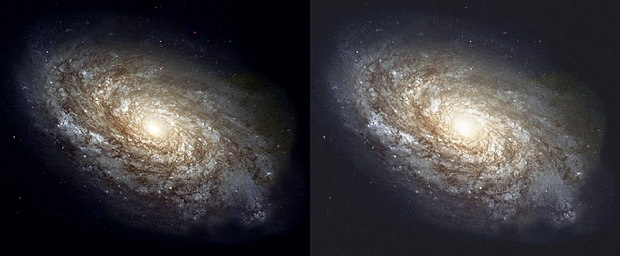

In [22]:
# No 5
# Jumlah Citra = 100

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[99]

for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  

        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 100')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)